In [1]:
import numpy as np

#농어의 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

#농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [8]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input.shape, test_input.shape, train_target.shape, test_target.shape


((42,), (14,), (42,), (14,))

In [9]:
# 훈련 세트와 테스트 세트를 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

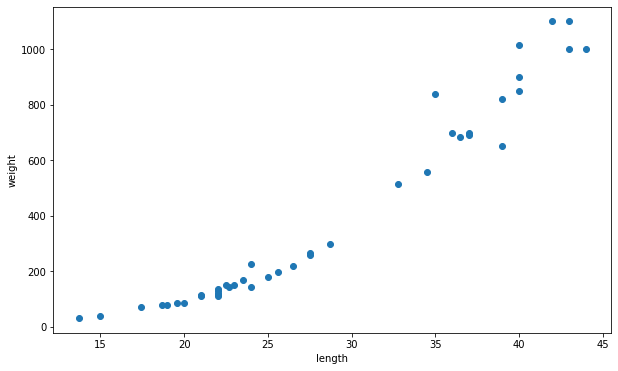

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6)) #사이즈
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [12]:
#데이터 훈련시키기(모델 만들기)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [13]:
#50cm인 농어의 무게를 예측하기 => 1241그램
print(lr.predict([[50]]))

[1241.83860323]


In [14]:
#이 선형회귀 모델의 가중치와 절편 
# (y=ax+b 에서의 a 와 b)
# 생선의 길이 = w(가중치)*생선의무게+b(절편)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [ ]:
# 즉 위의 가중치와 절편 생선무게를 대입해서
# 계산한 결과가 39.01714496 * 50+(-709.0186449535477)= 1241g 무게라는 것이다.



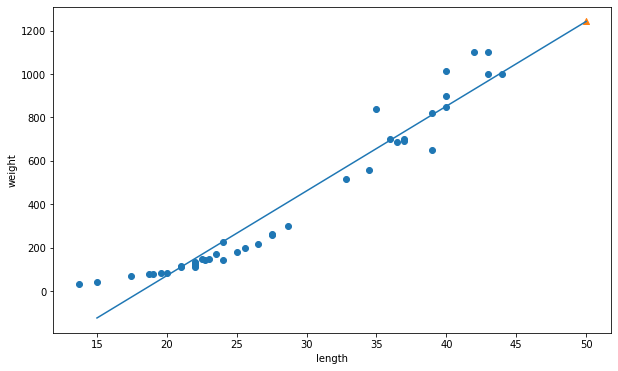

In [18]:
# 위의 방정식을 그래프로 표현하기


# 훈련 세트의 산점도 그리기
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기 (plot의 첫번째 매개변수는 x의 범위,
# 두번째 매개변수는 y의 범위이다.)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
# 마무리로 훈련세트&테스트세트의 정확도 출력
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#여기서 테스트세트가 훈련세트보다 정확도가 높으면 안되고
#두 세트의 정확도의 차이가 크면 과대적합이 일어난다.

0.939846333997604
0.8247503123313558
